In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [3]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [5]:
#функция стандартизации
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [6]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [7]:
#стандартизация
X_st = X.astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [206]:
def gradient_descent_reg_l2_graf(X_st, y, iterations, eta, reg):
    W = np.random.randn(X_st.shape[1])
    n = X_st.shape[0]    
        
    for i in range(0, iterations):
        y_pred = np.dot(X_st, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        #if i % (iterations / 10) == 0:
            #print(f'Iter: {i}, weights: {W}, error {err}')
                
    #print(f'Final MSE: {calc_mse(y, np.dot(X_st, W))}')
    return W

In [130]:
gradient_descent_reg_l2(X_st, y, iterations=10000, eta=2e-3, reg=1e-5)

array([56.4997175 ,  6.30077313, -0.3760365 ,  6.59619433])

Text(0, 0.5, 'Вес признака')

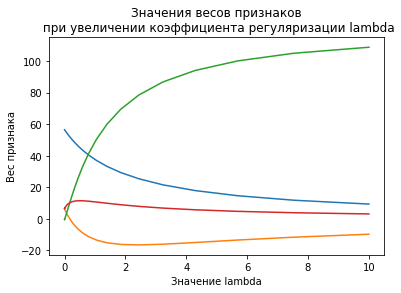

In [212]:
n = 50

coeffs = np.zeros((n, X_st.shape[1]))
lambda_list = np.logspace(-5, 1, n)

for i, val in enumerate(lambda_list):  
    coeffs[i, :] = gradient_descent_reg_l2_graf(X_st, y, iterations=10000, eta=2e-3, reg=val)

for i in range(X_st.shape[1]):
    plt.plot(lambda_list, coeffs[:, i])

plt.title('Значения весов признаков\n при увеличении коэффициента регуляризации lambda')
#plt.xticks(np.arange(0, 100, 10))
plt.xlabel('Значение lambda')
plt.ylabel('Вес признака')

### Вывод: исспользование L2-регуляризации для данной модели приводит к росту значения одного из признаков, тем самым увеличивается значение ошибки.

### Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
К одному и тому же признаку нельзя одновременно применить и стандартизацию и нормализацию, т.к. это два разных метода масштабированния данных. При нормализации диапазон значений укладывается между 0 и 1. При стандартизации среднее значение находится в нуле, а разброс значений располагается от -1 до 1 со стандартным отклонением в 1.

### Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [10]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [11]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [12]:
#стандартизация
X_st = X.astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [15]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * (W/np.abs(W)) # градиент регуляризации L1
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [22]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=1e-6)

Iter: 0, weights: [10.79534045  2.49496513  2.67802244  1.53331607], error 3411.7773770518847
Iter: 500, weights: [56.4999995   6.30305965 -0.35622926  6.57134528], error 24.90461888156252
Iter: 1000, weights: [56.4999995   6.30309147 -0.35638289  6.57147208], error 24.904618876914814
Iter: 1500, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.90461887691479
Iter: 2000, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.904618876914785
Iter: 2500, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.904618876914785
Iter: 3000, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.904618876914785
Iter: 3500, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.904618876914785
Iter: 4000, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.904618876914785
Iter: 4500, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.904618876914785
Final MSE: 24.904618876914785


array([56.4999995 ,  6.30309147, -0.3563829 ,  6.57147208])